In [1]:
#gerekli kütüphaneler import edilir
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from sklearn.model_selection import train_test_split

In [2]:
# Veri seti klasörü ve sınıf etiketleri
dataset_folder = "keditavsan"
class_labels = ["cat", "rabbit"]

# Görüntülerin boyutu ve kanal sayısı
image_width, image_height = 150, 150
channels = 3

# Veri ve etiketleri depolamak için boş listeler
data = []
labels = []

In [3]:
# Görüntüleri yükleme ve ön işleme
for label_idx, class_label in enumerate(class_labels):  # her sınıf için for döngüsü oluşturuldu
    class_folder = os.path.join(dataset_folder, class_label) # sınıf klasörünün yolu oluşturuldu
    for image_filename in os.listdir(class_folder):     
        image_path = os.path.join(class_folder, image_filename) # görüntü dosyasının yolu oluşturuldu
        image = load_img(image_path, target_size=(image_width, image_height)) # görüntü belirtilen boyutlara göre yüklendi
        image_array = img_to_array(image) # görüntü diziye dönüştürüldü
        data.append(image_array) # data listesine eklendi 
        labels.append(label_idx) # sınıf etiketleri listesine eklendi

In [4]:
# Verileri Numpy dizisine dönüştürme
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [5]:
# Etiketleri kategorik hale getirme (One-Hot Encoding)
labels = to_categorical(labels)

In [6]:
# Veri setini eğitim ve test kümelerine ayırma
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [7]:

# Modeli oluşturma
model = Sequential() # keras sequential modeli oluşturuldu

# Flatten katmanı eklendi, Flatten girdiyi tek vektör haline getirir. İnput shape parametresi girdinin boyutlarını alır.
model.add(Flatten(input_shape=(image_width, image_height, channels))) 

#128 nörona ait bir gizli katman eklendi. Aktivasyon kodu olarak relu seçildi.
model.add(Dense(128, activation="elu"))

#Overfitting'i engellemek için Dropout eklendi.
model.add(Dropout(0.25))

#Çıkış katmanı olarak Dense katmanı eklendi. Çıkış katmanında sınıf etiketi sayısı kadar nöron bulunur.
model.add(Dense(len(class_labels), activation="softmax"))


'''
model = Sequential()
model.add(Flatten(input_shape=(image_width, image_height, channels))) 

# İlk gizli katman
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.2)) # Dropout katmanı overfitting'i engellemek için

# İkinci gizli katman
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.2))

# Üçüncü gizli katman
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# Çıkış katmanı
model.add(Dense(len(class_labels), activation='softmax'))
'''

"\nmodel = Sequential()\nmodel.add(Flatten(input_shape=(image_width, image_height, channels))) \n\n# İlk gizli katman\nmodel.add(Dense(256, activation='relu')) \nmodel.add(Dropout(0.2)) # Dropout katmanı overfitting'i engellemek için\n\n# İkinci gizli katman\nmodel.add(Dense(128, activation='elu'))\nmodel.add(Dropout(0.2))\n\n# Üçüncü gizli katman\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.2))\n\n# Çıkış katmanı\nmodel.add(Dense(len(class_labels), activation='softmax'))\n"

In [8]:
'''
# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

'''
from tensorflow.keras.optimizers import Adagrad
optimizer = Adagrad(learning_rate = 0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [9]:
# Modeli eğitim verileriyle eğitme
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/10
35/35 [==============================] - 2s 43ms/step - loss: 1250.5980 - accuracy: 0.5384 - val_loss: 0.7605 - val_accuracy: 0.5604
Epoch 2/10
35/35 [==============================] - 2s 45ms/step - loss: 0.7740 - accuracy: 0.5804 - val_loss: 0.7270 - val_accuracy: 0.5917
Epoch 3/10
35/35 [==============================] - 1s 37ms/step - loss: 0.7847 - accuracy: 0.5723 - val_loss: 0.6759 - val_accuracy: 0.5708
Epoch 4/10
35/35 [==============================] - 1s 38ms/step - loss: 0.7366 - accuracy: 0.5759 - val_loss: 0.6762 - val_accuracy: 0.6042
Epoch 5/10
35/35 [==============================] - 2s 43ms/step - loss: 0.7348 - accuracy: 0.5777 - val_loss: 0.7241 - val_accuracy: 0.5938
Epoch 6/10
35/35 [==============================] - 1s 37ms/step - loss: 0.7506 - accuracy: 0.5902 - val_loss: 0.6531 - val_accuracy: 0.5708
Epoch 7/10
35/35 [==============================] - 1s 38ms/step - loss: 0.7105 - accuracy: 0.6045 - val_loss: 0.6556 - val_accuracy: 0.5667
Epoch 8/10

In [10]:
# Test veri seti üzerinde tahminlerde bulunma
predictions = model.predict(test_data)

# Tahminleri sınıf etiketlerine dönüştürme
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

15/15 [==============================] - 0s 10ms/step


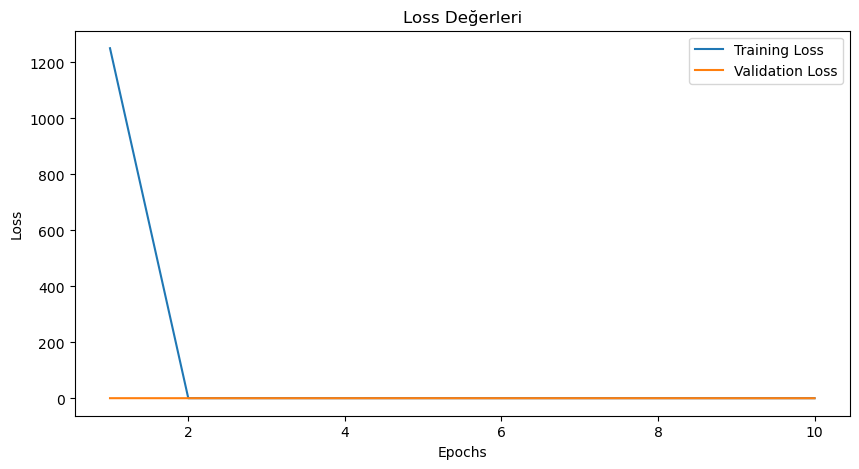

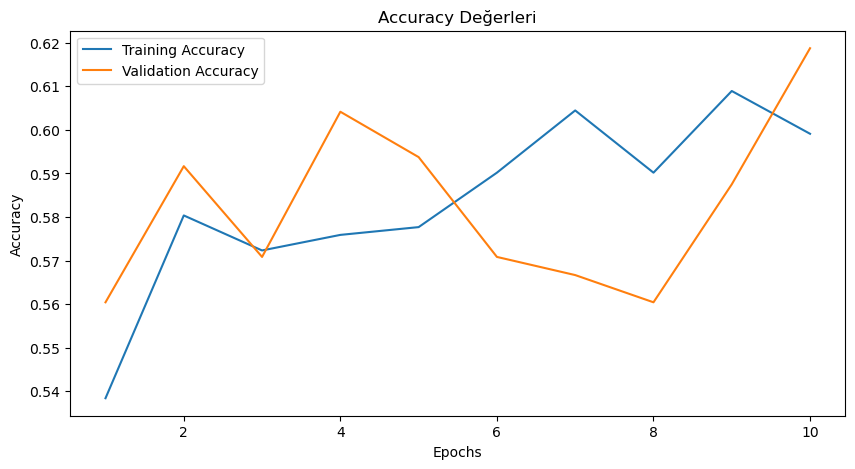

In [11]:
import matplotlib.pyplot as plt

# Eğitim sürecindeki loss ve accuracy değerlerini almak
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss değerlerini görselleştirme
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_loss)+1), train_loss, label='Training Loss')
plt.plot(range(1, len(val_loss)+1), val_loss, label='Validation Loss')
plt.title('Loss Değerleri')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy değerlerini görselleştirme
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_acc)+1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc)+1), val_acc, label='Validation Accuracy')
plt.title('Accuracy Değerleri')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


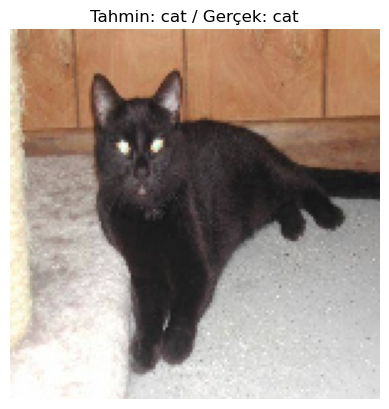

In [12]:
import matplotlib.pyplot as plt

# Seçilen görselin indeksi
sample_index = 9

# Seçilen görseli ve etiketleri alma
sample_image = test_data[sample_index]
sample_label = test_labels[sample_index]

# Görseli yeniden şekillendirme
sample_image = sample_image.astype(np.uint8)
sample_image = sample_image.reshape(image_width, image_height, channels)

# Görseli ve tahmin sonuçlarını gösterme
plt.imshow(sample_image)
plt.axis('off')
plt.title('Tahmin: {} / Gerçek: {}'.format(class_labels[predicted_labels[sample_index]], class_labels[true_labels[sample_index]]))
plt.show()
